In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('../data/Jinshenlu.txt',sep='\t',
              error_bad_lines=False)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,25,27,29,30,31,32,33,35,36,37,43,44,45,46,47,48,49,50,51,54,55,56,57,58,60,63,66,68,71,73,74,84,89,90,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
irr_idx=df[(df['qiren']=='旗人')|(df['fangkeben_only']==1) |
           (df['xing'].isnull() & df['ming'].isnull() & 
            df[ 'zihao'].isnull())].index.tolist()
malformed_idx=df[(df['year'].isin(['銀庫', '蒙古',7.0])) | 
                 (df['pinji_numeric']=='州') | df['year'].isnull() |
                df['qiren'].isnull() | (df['xuhao']=='麗')].index.tolist()
to_remove=set(irr_idx)|set(malformed_idx)

In [4]:
df.drop(to_remove, inplace=True)
df['year']=df['year'].astype(float)
df['pinji_numeric']=df['pinji_numeric'].astype(float)
df['xuhao']=df['xuhao'].astype(int)
df.drop(df[df['xuhao']>=20000].index.tolist(), inplace=True)

In [5]:
def str2float(s):
    if s in [np.nan, '不入流', '未入流']:
        return 10.0
    if s=='從一品(應為正四品)':
        return 4.0
    dic=dict(zip(['一', '二','三','四','五', '六','七','八','九'], np.arange(1,10)))
    base = dic[s[-2]]
    base+=0.5*('從' in s)
    return float(base)
for i in df['pinji_detailed'].unique():
    print(i, 'converted into', str2float(i), end='; ')

nan converted into 10.0; 正八品 converted into 8.0; 正七品 converted into 7.0; 從九品 converted into 9.5; 正六品 converted into 6.0; 從五品 converted into 5.5; 正五品 converted into 5.0; 從七品 converted into 7.5; 未入流 converted into 10.0; 從六品 converted into 6.5; 正二品 converted into 2.0; 從四品 converted into 4.5; 正九品 converted into 9.0; 正四品 converted into 4.0; 從三品 converted into 3.5; 八品 converted into 8.0; 正三品 converted into 3.0; 從一品 converted into 1.5; 正一品 converted into 1.0; 從二品 converted into 2.5; 從八品 converted into 8.5; 從一品(應為正四品) converted into 4.0; 三品 converted into 3.0; 九品 converted into 9.0; 四品 converted into 4.0; 不入流 converted into 10.0; 六品 converted into 6.0; 一品 converted into 1.0; 二品 converted into 2.0; 七品 converted into 7.0; 五品 converted into 5.0; 

In [6]:
df['pinji_detailed_numeric']=df['pinji_detailed'].apply(str2float)

total number of people 1824624

number of unique diqu （地区） 34
Top 20: [('京師', 277411), ('直隸', 137009), ('山東', 117227), ('四川', 108514), ('廣東', 100973), ('河南', 96405), ('江西', 94022), ('浙江', 93826), ('山西', 83787), ('湖北', 75208), ('江南', 73057), ('福建', 72888), ('湖南', 71482), ('雲南', 70277), ('廣西', 70100), ('陝西', 67441), ('安徽', 60790), ('貴州', 50984), ('甘肅', 45787), ('江蘇', 32316)]

number of unique guanzhi（官职) 25738
Top 20: [('典史', 218672), ('知縣', 197723), ('訓導', 139029), ('復設訓導', 127792), ('復設教諭', 117965), ('主事', 77227), ('教諭', 75397), ('學正', 38830), ('吏目', 36705), ('教授', 34693), ('知州', 30936), ('縣丞', 30325), ('經厯', 22609), ('知府', 22031), ('翰林院編修', 19527), ('郎中', 14866), ('員外郎', 12710), ('翰林院庶吉士', 10744), ('司獄', 9470), ('經歷', 8398)]

number of unique jigou_1 （机构一） 1089
Top 20: [('翰林院衙門', 41080), ('刑部衙門', 30615), ('順天府', 28839), ('戶部衙門', 25653), ('兗州府', 24549), ('總漕部院衙門', 19932), ('廣州府', 19043), ('兵部衙門', 16523), ('按察司衙門', 15704), ('西安府', 14864), ('開封府', 14473), ('保定府', 14095), ('濟南府', 13810), 

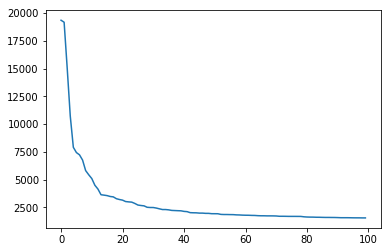

In [7]:
def plot_distri(arr, name):
    long_flag=False
    if len(arr.shape)==1:
        print('number of unique {}'.format(name), arr.unique().shape[0])
    else:
        
        print('number of unique {}'.format(name), arr.groupby(list(arr.columns)).ngroups)
        long_flag=True
    item_count={}
    for item in arr.values:

        if long_flag:
            it = tuple(item)
        else: 
            it=item
        
        if it not in item_count:
            item_count[it]=1
        else:
            item_count[it]+=1
    sorted_two_tuples=sorted(list(item_count.items()), key=lambda x:-x[1])
    print('Top 20:', sorted_two_tuples[:20])
    print()
    return sorted_two_tuples
#     plt.plot(sorted(item_count.values(),reverse=True))
print('total number of people', df.shape[0], end='\n\n')

plot_distri(df['diqu'], 'diqu （地区）')
plot_distri(df['guanzhi'],'guanzhi（官职)')
plot_distri(df['jigou_1'], 'jigou_1 （机构一）')
sorted_two_tuples=plot_distri(df[['jigou_1', 'guanzhi']], '(jigou_1, guanzhi) pair （机构一+官职）')
sorted_two_tuples2=plot_distri(df[['jigou_1', 'jigou_2','guanzhi']], '(jigou_1, jigou_2, guanzhi) tuple （机构一+机构二+官职）')
plt.plot(pd.DataFrame(sorted_two_tuples)[1][:100])
# print(df.groupby(['guanzhi', '', '']))

## the 5000th position has more than 60 records -> the defnition for position is suitable

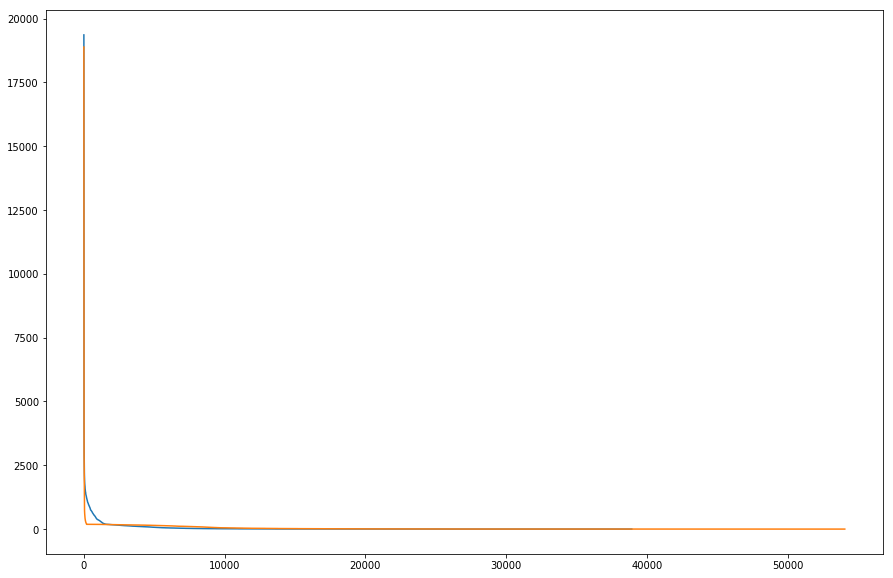

In [8]:
plt.figure(figsize=(15,10))
plt.plot(pd.DataFrame(sorted_two_tuples)[1])
plt.plot(pd.DataFrame(sorted_two_tuples2)[1])

# Real Analysis Starts Here

In [9]:
import os
ppry_file=r'../data/pickles/ppry.pkl'
if os.path.exists(ppry_file):
    ppry=pd.read_pickle(ppry_file)
else:
    ppry=df[['unique_id', 'jigou_1', 'guanzhi', 'pinji_detailed_numeric', 'year']] #person_position_rank_year
    open(ppry_file, 'a')
    ppry.to_pickle(ppry_file)

In [10]:
ppry.dropna(subset=['jigou_1', 'guanzhi'], inplace = True)
ppry.describe(include='all')

,unique_id,jigou_1,guanzhi,pinji_detailed_numeric,year
count,1.814096e+06,1814376,1814376,1.814376e+06,1.814376e+06
unique,NaN,1087,24100,NaN,NaN
top,NaN,翰林院衙門,典史,NaN,NaN
freq,NaN,41080,218671,NaN,NaN
mean,1.868408e+11,NaN,NaN,7.983527e+00,1.875674e+03
std,3.320073e+09,NaN,NaN,1.686329e+00,3.373761e+01
min,1.760400e+11,NaN,NaN,1.000000e+00,1.760750e+03
25%,1.856206e+11,NaN,NaN,7.000000e+00,1.865250e+03
50%,1.876209e+11,NaN,NaN,8.000000e+00,1.886250e+03
75%,1.892101e+11,NaN,NaN,9.500000e+00,1.899250e+03


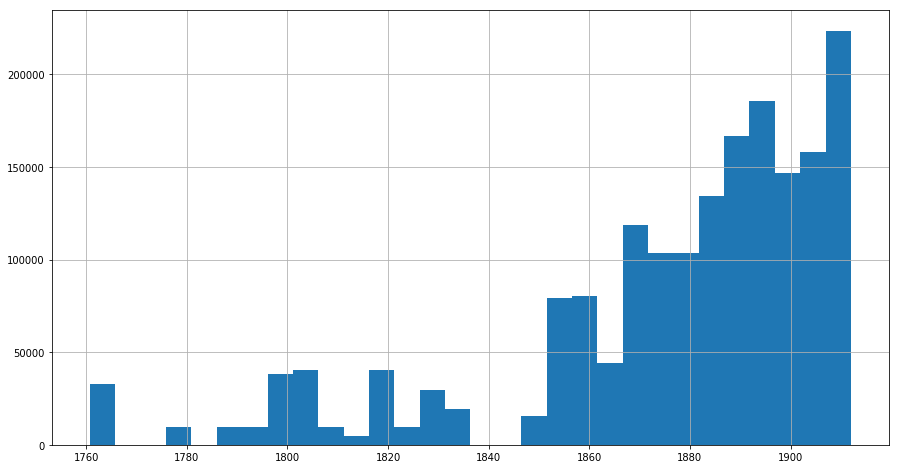

In [11]:
ppry['year'].hist(figsize=(15, 8), bins=30)

historical breakdown, window size

In [12]:
ppry=ppry[(ppry['year']<1895) & (ppry['year']>=1880)]
ppry.describe(include='all')

,unique_id,jigou_1,guanzhi,pinji_detailed_numeric,year
count,4.184850e+05,418506,418506,418506.000000,418506.000000
unique,NaN,491,7085,NaN,NaN
top,NaN,翰林院衙門,典史,NaN,NaN
freq,NaN,11179,51093,NaN,NaN
mean,1.880187e+11,NaN,NaN,7.987448,1888.660787
std,9.054189e+08,NaN,NaN,1.680880,3.799020
min,1.777308e+11,NaN,NaN,1.000000,1881.000000
25%,1.875308e+11,NaN,NaN,7.000000,1885.500000
50%,1.881413e+11,NaN,NaN,8.000000,1889.000000
75%,1.886309e+11,NaN,NaN,9.500000,1892.000000


In [14]:
print('sampling rate:',418506/1814376)

sampling rate: 0.23066111985608276


## temporarily remove nan in jigou_1 and guanzhi

1. index all the positions

In [15]:
def combine(x):
    return x[0] + ' ' + x[1] 
pos = ppry[['jigou_1', 'guanzhi']].apply(combine, axis=1).unique()

In [16]:
print(len(pos))
print(pos[:3])
index_table={position: idx for idx, position in enumerate(pos)}

11584
['翰林院衙門 翰林院編修' '龍安府 典史' '總漕部院衙門 分巡淮揚海河務兵備道兼理漕務海防鹽法等事駐劄清江浦']


1. construct A:
1) sum t for each edge -- T
2) count the # of each edge -- N
3) from N construct P -- P
4) use T, N, P to construct A -- A

In [17]:
N = {} # count the number of each edge
T = {} # sum the total time of each edge
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    if subtable.shape[0] == 1:
        continue
    first = True
    pre_pos = None
    cur_pos = None
    pre_year = None
    cur_year = None
    for index, row in subtable.sort_values('year').iterrows():
        if first:
            first = False
            pre_pos = row['jigou_1'] + ' ' + row['guanzhi']
            pre_year= index    
            continue
        else:
            cur_pos = row['jigou_1'] + ' ' + row['guanzhi']
            flow = (index_table[pre_pos], index_table[cur_pos])
            if flow[0] in N:
                count=N[flow[0]].get(flow[1])
                N[flow[0]][flow[1]] = count+1 if count else 1
                total_time=N[flow[0]].get(flow[1])
                T[flow[0]][flow[1]] = total_time + index - pre_year if total_time else index - pre_year          
            else:
                N[flow[0]]={flow[1]: 1}
                T[flow[0]]={flow[1]: index - pre_year}
            
            pre_pos = cur_pos
            pre_year = index

In [18]:
print(len(T))
print(len(N))

10917
10917


In [19]:
P={}
for pos1, row in tqdm(N.items()):
    s=sum(row.values())
    P[pos1]={}
    for pos2, count in row.items():
        P[pos1][pos2]=count/s

In [20]:
alpha=0.8
A={}
for pos1, row in tqdm(P.items()):
    A[pos1]={}
    for pos2, p in row.items():
        A[pos1][pos2]=(alpha**(T[pos1][pos2]/N[pos1][pos2]))*p

In [21]:
import numpy as np
mat_A=np.zeros((len(pos), len(pos)),dtype=np.float32)
for pos1, row in A.items():
    for pos2, a in row.items():
        mat_A[pos1, pos2]=a
print(mat_A.shape)

(11584, 11584)


In [22]:
pinji_iv={1: 16000, 1.5: 14500, 2: 13000, 2.5: 9500, 3: 6000, 3.5: 4850, 
 4: 3700, 4.5: 3050, 5: 2400, 5.5: 1825, 6: 1250, 6.5: 1225, 7:1200, 7.5:1000, 8: 100, 8.5: 90, 9: 80, 9.5:70, 10: 60}
print(len(pinji_iv))

19


assign intrinsic values according to: http://xh.5156edu.com/page/z8603m8110j19936.html

In [23]:
c=np.zeros(len(pos))
for idx, row in tqdm(ppry[['jigou_1', 'guanzhi', 'pinji_detailed_numeric']].iterrows()):
    c[index_table[row[0]+' '+row[1]]]=pinji_iv[row['pinji_detailed_numeric']] # c is going to be the intrinsic value vector
print(c[:10])


[  60.   60. 3700. 1200. 1825.   60. 2400. 1200.   70. 1200.]


一品 180两 180斛 16000两（总督） 290万
二品 155两 155斛 13000两（巡抚） 236万
三品 130两 130斛 6000两（按察史） 112万
四品 105两 105斛 3700两（道员） 70万
五品 80两 80斛 2400两（从四品知府） 46万
六品 60两 60斛 1250两（从五品知州） 25万
七品 45两 45斛 1200两（知县） 23万
八品 40两 40斛 2万1千
九品 33两1.14钱 33斛1.14斗 1万8千
未入流 31两5钱 31斛5斗 1万1千

In [24]:
import pickle

# write a file
f = open("../data/pickles/all_important_inter_1880_1895.pickle", "wb") # index_table, A, T, N, P, c, pos
# for obj in [index_table, A, T, N, P, mat_A, c, pos]:
pickle.dump(index_table, f, protocol=4)
pickle.dump(A, f, protocol=4)
pickle.dump(T, f, protocol=4)
pickle.dump(N, f, protocol=4)
pickle.dump(P, f, protocol=4)
# pickle.dump(mat_A, f, protocol=4)
pickle.dump(c, f, protocol=4)
pickle.dump(pos, f, protocol=4)

f.close()

In [1]:
import pickle
# for loading the objects
f = open("../data/pickles/all_important_inter_1880_1895.pickle", "rb")
index_table = pickle.load(f)
A = pickle.load(f)
T = pickle.load(f)
N = pickle.load(f)
P = pickle.load(f)
# mat_A = pickle.load(f, protocol=4)
c = pickle.load(f)
pos = pickle.load(f)
    
f.close()

# Final calculation of value

In [25]:
for i in range(len(pos)):
    mat_A[i, i]= 1-mat_A[i,i]

### Plan A solve it on PC

In [26]:
x=np.linalg.solve(mat_A, c) # unsolvable on PC, moved to server

### Plan B solved by server, load result

In [16]:
import pickle
f = open("../data/pickles/x_alpha08.pickle", "rb") 
x=pickle.load(f)
f.close()

In [27]:
x[:50]

array([-4.90074700e+01,  2.60196731e+02,  4.19333321e+03,  4.29096497e+03,
        7.09162547e+03,  1.89255382e+02,  2.40000000e+03,  4.94585890e+03,
        2.25500684e+02, -1.29575233e+03, -3.63793523e+03,  3.91284912e-01,
        4.70327401e+03, -4.91700307e+02,  5.28076804e+03,  3.13928093e+02,
        1.20000000e+03,  4.44412348e+03,  4.10505261e+03,  1.19673222e+04,
       -3.86705249e+03, -3.10604205e+03, -1.96628738e+01,  1.59385762e+02,
        2.46501008e+02,  2.66548294e+02,  1.49800262e+02,  1.93186375e+02,
        4.89116118e+02,  2.68803674e+02,  2.46501008e+02,  2.46501008e+02,
        2.62509173e+02,  5.38838547e+03,  2.46501008e+02,  4.28909816e+03,
        1.96763526e+02,  2.16201082e+02,  4.23127110e+03, -1.45665276e+03,
        2.41532223e+03,  5.09101717e+03,  5.37029586e+03,  5.30189813e+03,
        8.89319540e+03,  8.98926318e+03,  2.93469671e+02,  4.31154330e+03,
        1.49800262e+02,  1.93186375e+02])

In [36]:
c[:50]

array([  60.,   60., 3700., 1200., 1825.,   60., 2400., 1200.,   70.,
       1200., 4850.,   60., 1200., 1200., 1200.,   70., 1200., 1200.,
       1250., 3700., 3700., 3700.,   60.,   60.,   60.,   60.,   60.,
         60.,  100.,   60.,   60.,   60.,   60., 1200.,   60., 1200.,
         60.,   60., 1250., 1250., 1250., 1250., 1200., 1200., 1825.,
       1825.,   60., 1200.,   60.,   60.])

In [29]:
print(len(pos)==len(c))
potential=x-c

True


In [30]:
counts=[]
vc=ppry[['jigou_1', 'guanzhi']].apply(combine, axis=1).value_counts()

In [31]:
iv_pinji={}
for key, value in pinji_iv.items():
    iv_pinji[value]=key
for i in pos:
    counts.append(vc[i])
result=[(x,y,z,iv_pinji[c[index_table[x]]])for x,y,z in list(zip(pos, potential, counts))]
result=pd.DataFrame(result, columns=['position', 'potential', 'occurrence', 'pinji'])
f=open('../data/pickles/result_1980_1995.pickle', 'wb')
pickle.dump(result, f)
f.close()

In [37]:
for pj in np.arange(3,10.5,0.5):
    query_result=result[(result['occurrence']>3) & (result['pinji']==pj) ].sort_values(by='potential', ascending = False)
    query_result.to_csv('../data/result_csv/pinji_{}_1880_1895.csv'.format(pj), encoding="utf_8_sig", index=False)

# Calculate distance between two ordering using proportion of reverse pairs

In [53]:
def ordering_dist(o1,o2):
    o1=list(o1)
    o2=list(o2)
    l=[]
    for item in o2:
        try:
            l.append(o1.index(item))
        except:
            pass
    total=len(l)*(len(l)-1)/2
    reverse=0
    for idx, item1  in enumerate(l):
        for item2 in l[idx+1:]:
            if item1>item2:
                reverse+=1
    return reverse/total
        
ds=[]
for pj in np.arange(3,10.5,0.5):
    partial_query_result=pd.read_csv('../data/result_csv/pinji_{}_1880_1895.csv'.format(pj), encoding="utf_8_sig")
    query_result=pd.read_csv('../data/result_csv/pinji_{}.csv'.format(pj), encoding="utf_8_sig")
    d=ordering_dist(query_result['position'], partial_query_result['position'])
    ds.append(d)
    print(pj, 'nomalized ordering distance:', d)

3.0 nomalized ordering distance: 0.3552036199095023
3.5 nomalized ordering distance: 0.2727272727272727
4.0 nomalized ordering distance: 0.28283479803273404
4.5 nomalized ordering distance: 0.2919812620556627
5.0 nomalized ordering distance: 0.1707966825835637
5.5 nomalized ordering distance: 0.17102611085661934
6.0 nomalized ordering distance: 0.1768867122402476
6.5 nomalized ordering distance: 0.20711354309165528
7.0 nomalized ordering distance: 0.1767523060086508
7.5 nomalized ordering distance: 0.17873450750163078
8.0 nomalized ordering distance: 0.29385858372498286
8.5 nomalized ordering distance: 0.23914166799763245
9.0 nomalized ordering distance: 0.32439024390243903
9.5 nomalized ordering distance: 0.227027697395618
10.0 nomalized ordering distance: 0.23771826259864537


In [54]:
np.array(ds[4:]).mean()

0.2184951198092441

## This means we can use ~20% of the data to achieve ~80% accuracy of the pairs.

In [34]:
print(('position', 'potential score', 'number of people'))
count=0
for r in result.sort_values(by='potential', ascending = False).values:
    if r[2]>10:
        print(r)
        count+=1
    if count>100:
        break

('position', 'potential score', 'number of people')
['兵部衙門 太子少保兵部尚書' 53379.222960718325 14 1.5]
['鄖陽府 鎮守湖北鄖陽等處地方總兵官' 50473.40056953359 42 2.0]
['漢陽府 鎮守長江水師湖北漢陽鎮總兵官' 50388.596994485495 37 2.0]
['涼州府 鎮守甘肅涼州等處地方掛印總兵官駐劄涼州府' 50388.596994485495 43 2.0]
['鎮江府 鎮守長江水師江南瓜州鎮總兵官' 48588.106163503544 18 2.0]
['福州府 鎮守福建海壇等處地方總兵官' 48133.31735654173 16 2.0]
['太平府 鎮守安徽皖南等處地方總兵官' 48133.317356541724 18 2.0]
['宣化府 鎮守宣化府統轄十二城堡等處地方掛印總兵官' 47167.049060530415 12 2.0]
['南甯府 鎮守廣西左江南潯鬱上等處地方統轄漢土官兵總兵官' 46200.94719861721 12 2.0]
['惠州府 提督廣東統轄全省陸路等處地方軍務節製各鎮' 45570.38374590423 35 1.5]
['總漕部院衙門 頭品頂戴兵部侍郎兼都察院右副都禦史總督淮揚等處地方漕運提督河防軍務兼理粮餉' 45556.96988946323 12 2.0]
['開化府 鎮守雲南開化廣西廣南等處地方總兵官' 43179.62677740168 41 2.0]
['韶州府 鎮守廣東右翼廣南韶等處地方總兵官' 41376.059803323165 35 2.0]
['大理府 提督雲南全省等處地方軍務節製各鎮' 41306.93012615718 34 1.5]
['建甯府 鎮守福建建甯等處地方總兵官' 40582.34183753552 38 2.0]
['安順府 鎮守安義統轄長安普永等處地方總兵官' 40451.49290909641 33 2.0]
['甯夏府 鎮守甘肅甯夏等處地方總兵官' 39602.15981275295 28 2.0]
['鎮江府 鎮守淮揚等處地方總兵官' 39328.30921336266 18 2.0]
['鎮江府 提督江南長江水師軍務節製各鎮' 38818

In [119]:
print(('position', 'potential score', 'number of people'))
count=0
for r in sorted_result:
    if r[2]>10:
        print(r)
        count+=1
    if count>100:
        break

('position', 'potential score', 'number of people')
('戶部衙門 通州中倉監督刑部員外郎', 254899.2825510917, 18)
('軍機處 刑部即補員外郎', 199513.55876918195, 21)
('戶部衙門 刑部員外郎', 187740.77861144932, 53)
('總理各國事務衙門 刑部員外郎', 176025.59365262344, 32)
('會典館 刑部候補員外郎', 161530.97536385152, 16)
('戶部衙門 刑部員外', 157928.6125748708, 15)
('刑部衙門 ?', 157163.4616044701, 21)
('會典館 刑部員外郎', 148602.84808686937, 53)
('軍機處 刑部員外郎', 143695.7218413521, 42)
('總理各國事務衙門 刑部候補員外郎', 114975.0000000001, 17)
('邢部衙門 員外郎', 82082.37810593242, 17)
('刑部 主事', 70716.42255668348, 28)
('刑部 額外主事', 38005.75170762783, 13)
('軍機處 刑部主事', 32650.945215798754, 22)
('順天府 南路捕盜駐黃村兼河間府同知分轄霸保文大固永東大等八州縣', 18863.83801586864, 12)
('濟南府 清軍同知', 16585.41705636667, 23)
('邢部衙門 主事', 14515.917205522584, 32)
('欽天監衙門 欽天監監副', 13220.361379332802, 17)
('順天府 尚書銜提督直隸通省等處地方軍務節製各鎮駐劄古北口', 13068.569312952633, 14)
('戶部衙門 刑部主事', 12725.728757306395, 29)
('鬆江府 太子少保提督江南全省等處地方軍務節製各鎮', 12679.84690685344, 11)
('刑部衙門 主事', 12634.625888696663, 19359)
('順天府 太子少保提督直隸通省等處地方軍務節製各鎮駐劄古北口', 12498.712601060815, 

In [ ]:
总兵官，知府/同知/知州，副都御史

In [22]:
count=0
year=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    count+=1
    year+=(subtable['year'].max()-subtable['year'].min())

KeyboardInterrupt: 

In [87]:
np.array(potential).mean()

32981.741538375696

# For Visualization

## 1. For the whole network

In [13]:
import networkx as nx
def flatten_dict(d):
    res=[]
    for key, item in tqdm(d.items()):
        res.append((*key, item))
    return res
g=nx.DiGraph()
g.add_weighted_edges_from(flatten_dict(flow_count))

In [16]:
(len(list(g.nodes)), len(list(g.edges)))

(34639, 105063)

In [18]:
nx.write_gexf(g, r'../data/gephi/pos_network.gexf')

## 2. For subgraph

In [57]:
def create_subgraph(start_pos, graph, pos, depth=5):
    # do a BDS, start_pos IS AN INDEX! NOT A NAME!
    subgraph=[] # used to store edges
    this_layer=[] # store the nodes to be traced further
    next_layer=[start_pos]
    past={start_pos:1} # store every nodes seen before
    for layer in range(depth):
        this_layer=next_layer.copy()
        next_layer=[]
        if len(this_layer)==0:
            break
        for pos1 in this_layer:
            row=graph.get(pos1)
            if row:
                for pos2, count in row.items():
                    subgraph.append((pos[pos1], pos[pos2], count))
                    if pos2 not in past:
                        past[pos2]=1
                        next_layer.append(pos2)
                        
                    
                
                
                
    return subgraph

In [69]:
import networkx as nx
position_name='江甯府 南捕通判'
r=create_subgraph(index_table[position_name], N, pos, depth=3)
print(len(r))
print(sorted(r))
subg=nx.DiGraph()
subg.add_weighted_edges_from(r)
nx.write_gexf(subg, r'../data/gephi/subgraph_{}.gexf'.format(position_name))

1
[('江甯府 南捕通判', '江甯府 南捕通判', 125)]


## Micro Measurement: in unit of shortest segment with length 1

In [15]:
%%script false
pos_score={} #{pos->[promotions, count]}
duplicate_count=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    
    pre_year=None
    pre_pinji=None
    pre_pos=None
    for index, row in subtable.sort_values('year').iterrows():
#         print(row)
        if not pre_year:
            pre_year=row['year']
            pre_pinji=row['pinji_detailed_numeric']
            pre_pos=(row['jigou_1'], row['guanzhi'])
        else:
            promotion=-(row['pinji_detailed_numeric']-pre_pinji) # if get promoted, the numeric value of rank actually decreases
            time=row['year']-pre_year
            if time==0:
                duplicate_count+=1
                #update tracking variables
                pre_year=row['year']
                pre_pinji=row['pinji_detailed_numeric']
                continue
            
            # update pos_score for pre_pose
            if pre_pos in pos_score:
                pos_score[pre_pos][0]+=(promotion/time)
                pos_score[pre_pos][1]+=1
            else:
                pos_score[pre_pos]=[promotion/time, 1]
                
            #update tracking variables
            pre_year=row['year']
            pre_pinji=row['pinji_detailed_numeric']
            pre_pos=(row['jigou_1'], row['guanzhi'])

In [16]:
print(duplicate_count)

16573


In [18]:
pos_score_micro=pos_score
pos_normscore={}
curoff_occurences=100
for key, value in pos_score_micro.items():
    if value[1]<curoff_occurences: # MUST do this filteration to remove noise: remove occurences < 5
        continue
    pos_normscore[key]=[value[0]/value[1], value[1]]
pos_ranking_micro=sorted(list(pos_normscore.items()), key=lambda x: -x[1][0])
from pprint import pprint
pprint(pos_ranking_micro[:30])

[(('農工商部衙門', '小京官'), [11.880597014925373, 201]),
 (('兗州府', '至聖廟官'), [8.083700299700299, 325]),
 (('翰林院衙門', '教習庶吉士'), [3.260049085985843, 233]),
 (('法部衙門', '候補小京官'), [3.0286975717439293, 453]),
 (('內閣', '漢票籖中書舍人'), [2.862087661810777, 358]),
 (('內閣衙門', '漢票籖中書舍人'), [2.861987437891697, 277]),
 (('天津府', '小直沽批驗所大使'), [2.2363636363636363, 110]),
 (('學部衙門', '小京官'), [2.085734168406402, 479]),
 ((nan, '撫標中軍絫將兼管左營事務'), [1.8944561732739074, 105]),
 (('撫州府', '縣丞移駐南城'), [1.5125242889948771, 111]),
 (('太醫院衙門', '太醫院左院判'), [1.445535141941392, 128]),
 (('欽天監衙門', '欽天監監正'), [1.3791348600508906, 131]),
 (('两淮鹽院衙門', '新興場鹽課大使'), [1.3597789115646257, 112]),
 (('布政司衙門', '廣西等處承宣布政使司布政使'), [1.3133851549909945, 137]),
 (('太醫院衙門', '太醫院右院判'), [1.136150234741784, 142]),
 (('两淮鹽院衙門', '廣盈庫大使'), [1.0077519379844961, 129]),
 (('布政司衙門', '湖北等處承宣布政使司布政使'), [0.9987301587301587, 122]),
 (('布政司衙門', '四川等處承宣布政使司布政使'), [0.988608776844071, 119]),
 (('布政司衙門', '浙江等處承宣布政使司布政使兼管海防事務'), [0.9739072837112053, 108]),
 (('總漕部院衙門', '督運守備'

Note: a minor problem remains unsolved: duplicate record a specific person in a specific year

## Local Measurement: in unit of a person

In [22]:
import random

pos_score={} #{pos->[promotions, count]}
duplicate_count2=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    # sample a subset to reduce size
#     if random.uniform(0, 1)>0.1:
#         continue
        
        
    st=list(subtable.sort_values('year').T.to_dict().values())
    length=len(st)
    for idx, row1 in enumerate(st):
        if idx>=length-1:
            break
            
        #start calculating for a specific position in one person's career
        pos=(row1['jigou_1'], row1['guanzhi'])
        score=0
        count=0
        cur_pinji=row1['pinji_detailed_numeric']
        cur_year=row1['year']
        for row2 in st[idx+1:]:
            promotion=-(row2['pinji_detailed_numeric']-cur_pinji) # if get promoted, the numeric value of rank actually decreases
            time=row2['year']-cur_year
            if time==0:
                continue
            score+=promotion/time
            count+=1
            
        if count==0:
            duplicate_count2+=1
            continue
        # update pos_score
        if pos in pos_score:
            pos_score[pos][0]+=(score/count)
            pos_score[pos][1]+=1
        else:
            pos_score[pos]=[score/count, 1]
                

In [23]:
pos_score_local=pos_score
pos_normscore={}
curoff_occurences=100
for key, value in pos_score_local.items():
    if value[1]<curoff_occurences: # MUST do this filteration to remove noise: remove occurences < 5
        continue
    pos_normscore[key]=[value[0]/value[1], value[1]]
pos_ranking_local=sorted(list(pos_normscore.items()), key=lambda x: -x[1][0])
from pprint import pprint
pprint(pos_ranking_local[:30])

[(('農工商部衙門', '小京官'), [10.526647609398369, 188]),
 (('法部衙門', '候補小京官'), [3.373771855972537, 432]),
 (('學部衙門', '小京官'), [1.97818654841495, 460]),
 (('兵部衙門', '監督'), [1.9673997910224026, 105]),
 (('布政司衙門', '山西等處承宣布政使司布政使'), [1.644105405189331, 100]),
 (('農工商部衙門', '學習小京官'), [1.44170421306249, 210]),
 (('布政司衙門', '雲南等處承宣布政使司布政使'), [1.2313467942884242, 100]),
 (('翰林院衙門', '教習庶吉士'), [1.1391520147823104, 234]),
 (('兗州府', '至聖廟官'), [1.1196570809114357, 339]),
 (('內閣衙門', '漢票籖中書舍人'), [1.1039717704498062, 270]),
 (('布政司衙門', '廣西等處承宣布政使司布政使'), [0.919105052988783, 139]),
 (('布政司衙門', '陝西等處承宣布政使司布政使'), [0.9126802642750892, 110]),
 ((nan, '撫標中軍絫將兼管左營事務'), [0.7318082788388163, 106]),
 (('學部衙門', '七品小京官'), [0.7283413871295645, 145]),
 (('布政司衙門', '江西等處承宣布政使司布政使'), [0.6696303947329624, 111]),
 (('內閣', '漢票籖中書舍人'), [0.6664284910146798, 361]),
 (('農工商部衙門', '候補小京官'), [0.6054302584547858, 226]),
 (('內閣衙門', '漢標籤中書舍人'), [0.5963674736367627, 105]),
 (('內閣衙門', '漠票韱中書舍人'), [0.5647383865452573, 123]),
 (('布政司衙門', '四川等處承宣布政使司

In [21]:
count=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    if '小京官' in subtable['guanzhi'].unique() and '農工商部衙門' in subtable['jigou_1'].unique():
        print(subtable.sort_values(by='year')[['jigou_1','guanzhi' ,'pinji_detailed_numeric', 'year']])
        count+=1
#     if count>3:
#         break

        jigou_1 guanzhi  pinji_detailed_numeric     year
2797563  農工商部衙門     小京官                    10.0  1911.75
2797564  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2879955  農工商部衙門  額外藝師藝士                    10.0  1907.50
2879956  農工商部衙門  額外藝師藝士                    10.0  1907.75
2879957  農工商部衙門  額外藝師藝士                    10.0  1908.00
2879958  農工商部衙門  額外藝師藝士                    10.0  1908.25
2879959  農工商部衙門  額外藝師藝士                    10.0  1908.50
2879960  農工商部衙門  額外藝師藝士                    10.0  1908.75
2879961  農工商部衙門  額外藝師藝士                    10.0  1909.00
2879962    學部衙門     小京官                    10.0  1909.25
2879963  農工商部衙門  額外藝師藝士                    10.0  1909.25
2879964    學部衙門     小京官                    10.0  1909.50
2879965  農工商部衙門  候補藝師藝士                    10.0  1909.50
2879966    學部衙門     小京官                    10.0  1909.75
2879967  農工商部衙門  候補藝師藝士                    10.0  1909.75
2879969  農工商部衙門  候補藝師藝士        

2939038  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2939039  農工商部衙門   候補小京官                    10.0  1909.50
2939040  農工商部衙門   候補小京官                    10.0  1909.75
2939041  農工商部衙門   候補小京官                    10.0  1910.00
2939042  農工商部衙門   候補小京官                    10.0  1910.25
2939043  農工商部衙門   候補小京官                    10.0  1910.50
2939044  農工商部衙門   候補小京官                    10.0  1910.75
2939045  農工商部衙門   候補小京官                    10.0  1911.00
2939046  農工商部衙門   候補小京官                    10.0  1911.25
2939047  農工商部衙門   候補小京官                    10.0  1911.50
2939048  農工商部衙門     小京官                    10.0  1911.75
2939049  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2939050  農工商部衙門   候補小京官                    10.0  1909.50
2939051  農工商部衙門   候補小京官                    10.0  1909.75
2939052  農工商部衙門   候補小京官                    10.0  1910.00
2939053     海軍處      科員        

2943850  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2949359  農工商部衙門   候補小京官                    10.0  1910.00
2949360  農工商部衙門   候補小京官                    10.0  1910.25
2949361  農工商部衙門   候補小京官                    10.0  1910.50
2949362  農工商部衙門   候補小京官                    10.0  1910.75
2949363  農工商部衙門   候補小京官                    10.0  1911.00
2949364  農工商部衙門   候補小京官                    10.0  1911.25
2949365  農工商部衙門   候補小京官                    10.0  1911.50
2949366  農工商部衙門     小京官                    10.0  1911.75
2949367  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2952688  農工商部衙門   候補小京官                    10.0  1910.25
2952689  農工商部衙門   候補小京官                    10.0  1910.50
2952690  農工商部衙門   候補小京官                    10.0  1910.75
2952691  農工商部衙門   候補小京官                    10.0  1911.00
2952692  農工商部衙門   候補小京官                    10.0  1911.25
2952693  農工商部衙門   候補小京官        

2957677  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2957678  農工商部衙門   候補小京官                    10.0  1910.50
2957679  農工商部衙門   候補小京官                    10.0  1910.75
2957680  農工商部衙門   候補小京官                    10.0  1911.00
2957681  農工商部衙門   候補小京官                    10.0  1911.25
2957682  農工商部衙門   候補小京官                    10.0  1911.50
2957683  農工商部衙門     小京官                    10.0  1911.75
2957684  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2957685  農工商部衙門   學習小京官                    10.0  1910.50
2957686  農工商部衙門   學習小京官                    10.0  1910.75
2957687  農工商部衙門   學習小京官                    10.0  1911.00
2957688  農工商部衙門   學習小京官                    10.0  1911.25
2957689  農工商部衙門   學習小京官                    10.0  1911.50
2957690  農工商部衙門     小京官                    10.0  1911.75
2957691  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_

2961683  農工商部衙門     小京官                    10.0  1911.75
        jigou_1 guanzhi  pinji_detailed_numeric     year
2961684  農工商部衙門   學習小京官                    10.0  1910.75
2961685  農工商部衙門   學習小京官                    10.0  1911.00
2961686  農工商部衙門   學習小京官                    10.0  1911.25
2961687  農工商部衙門   學習小京官                    10.0  1911.50
2961688  農工商部衙門     小京官                    10.0  1911.75
2961689  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2965585  農工商部衙門   候補小京官                    10.0  1911.25
2965586  農工商部衙門   候補小京官                    10.0  1911.50
2965587  農工商部衙門     小京官                    10.0  1911.75
2965588  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2965589  農工商部衙門   學習小京官                    10.0  1911.25
2965590  農工商部衙門   學習小京官                    10.0  1911.50
2965591  農工商部衙門     小京官                    10.0  1911.75
2965592  農工商部衙門   七品小京官        

2968702  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2968703  農工商部衙門   學習小京官                    10.0  1911.50
2968704  農工商部衙門     小京官                    10.0  1911.75
2968705  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2968706  農工商部衙門   學習小京官                    10.0  1911.50
2968707  農工商部衙門     小京官                    10.0  1911.75
2968708  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2968709  農工商部衙門   學習小京官                    10.0  1911.50
2968710  農工商部衙門     小京官                    10.0  1911.75
2968711  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2968712  農工商部衙門   學習小京官                    10.0  1911.50
2968713  農工商部衙門     小京官                    10.0  1911.75
2968714  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_

2971932  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2971933  農工商部衙門     小京官                    10.0  1911.75
2971934  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2971935  農工商部衙門     小京官                    10.0  1911.75
2971936  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2971937  農工商部衙門     小京官                    10.0  1911.75
2971938  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2971939  農工商部衙門     小京官                    10.0  1911.75
2971940  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2971941  農工商部衙門     小京官                    10.0  1911.75
2971942  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2971943  農工商部衙門     小京官        

2972027  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2972028  農工商部衙門     小京官                    10.0  1911.75
2972029  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2972030  農工商部衙門     小京官                    10.0  1911.75
2972031  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2972032  農工商部衙門     小京官                    10.0  1911.75
2972033  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2972034  農工商部衙門     小京官                    10.0  1911.75
2972035  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2972036  農工商部衙門     小京官                    10.0  1911.75
2972037  農工商部衙門   七品小京官                     7.0  1912.00
        jigou_1 guanzhi  pinji_detailed_numeric     year
2972038  農工商部衙門     小京官        